Distance of a point from a line:   
* the line is defined by w as: $\{x: \langle w,x \rangle = 0\}$. The norm of $w$ is one: $\|w\| = \|w\|^2 = \sum_i w_i^2 = 1$ 
* the point $\hat x$ 
* the distance: $\min_{x: \langle w,x \rangle = 0}\| \hat x - x \| = |\langle w, \hat x \rangle|$
* $\max_{\gamma, w} \gamma$ such that $y_i \langle w, x_i \rangle \ge \gamma$, $\|w\|=1$. When $\hat \gamma = \gamma \|w\|$  it is $\max_{\gamma, w} \frac{\hat \gamma}{\|w\|}$ such that $y_i \langle w, x_i \rangle \ge \hat \gamma$. And then we can work with $\hat{\gamma} = 1$   


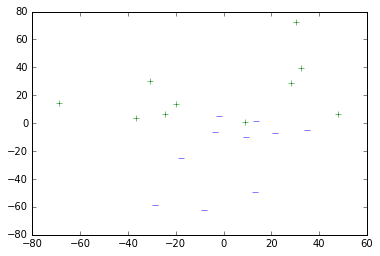

In [24]:
#reading our 2D data, and centering by deleting the average:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
city_list = list()
forest_list = list()

for i in range(10):
    img = mpimg.imread('../data/beach_r' + str(i) + '.jpg')
    forest_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])

    img = mpimg.imread('../data/urban' + str(i) + '.jpg')
    city_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])

average = np.mean(city_list + forest_list, axis=0)
city_array_centered = np.array(city_list)-average   
forest_array_centered = np.array(forest_list)-average  
plt.plot(forest_array_centered[:,0], forest_array_centered[:,1], 'g+')
plt.plot(city_array_centered[:,0], city_array_centered[:,1], 'b_')


First, we visualize a hyperplane 

In [34]:
from IPython import display
import time 

def plot_seperating_hyperlane(w):
    print w
    w = w / np.linalg.norm(w)
    t = np.arange(-60.0, 80.0, 10.0)
    plt.plot(w[1]*t, -w[0]*t, 'k--', lw=2)
    plt.plot(forest_array_centered[:,0], forest_array_centered[:,1], 'g+')
    plt.plot(city_array_centered[:,0], city_array_centered[:,1], 'b_')
    plt.show()
    display.clear_output(wait=True)
    time.sleep(0.5)

# Dataset. 

In [35]:
x = np.row_stack((city_array_centered, forest_array_centered))
x

array([[ -8.07066127, -62.17923231],
       [  9.57897025, -10.11615489],
       [ 21.5526573 ,  -7.02326243],
       [ 34.90629732,  -4.53920233],
       [ 13.06751017, -49.55440928],
       [-28.62273046, -58.45198011],
       [ -2.04532629,   5.43604489],
       [-17.79339538, -24.75185693],
       [ 13.40405881,   1.46022557],
       [ -3.51962259,  -6.56106391],
       [ 30.33434454,  72.86523812],
       [  8.8414532 ,   0.53770223],
       [-30.61520328,  30.00340465],
       [-19.82686191,  13.44959114],
       [-24.60917754,   6.63899301],
       [-36.5841297 ,   3.7618837 ],
       [ 48.0243708 ,   6.30903326],
       [ 28.30330816,  28.82610903],
       [ 32.37461479,  39.54460672],
       [-68.70047691,  14.34432989]])

And their labels

In [36]:
y = np.array([-1]*10 + [1]*10)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [37]:
total_examples = len(y)
total_examples

20

# The perceptron learning algorithm

In [ ]:
def perceptron(x, y):
    w = np.zeros(2)
    total_iterations = 10
    for iteration in range(total_iterations):
        for i in range(total_examples):
            if np.dot(x[i], w)*y[i] <= 0:
                w = w + x[i]*y[i]
                plot_seperating_hyperlane(w)
    return w

In [23]:
#w = perceptron(x,y)

KeyboardInterrupt: 

In [ ]:
plot_seperating_hyperlane(w)



# The logistoc regression learning algorithm

In [38]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
classifier.fit(x,y)
w = classifier.coef_[0]
w / np.linalg.norm(w)

array([-0.05000942,  0.99874875])

[-0.0159122   0.31778591]


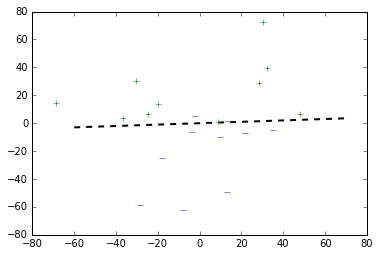

In [39]:
plot_seperating_hyperlane(w)


# The SVM learning algorithm

In [40]:
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(x,y)

w = classifier.coef_[0]
w / np.linalg.norm(w)


array([-0.03015084,  0.99954536])

[-0.00576887  0.19124677]


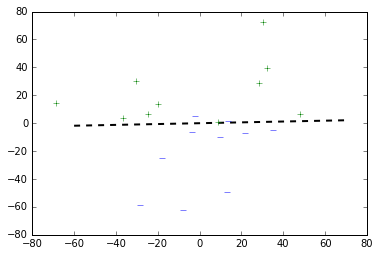

In [41]:
plot_seperating_hyperlane(w)
